In [1]:
#Reading data
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
def makeFloats(data):
  for i in range(len(data["Keskmine"])):
    a=data.iloc[i,9]
    if type(a)==str:
      a=a.replace(",",".")
      a=float(a)
      data.iat[i,9]=a

In [3]:
def average(dictionary):
    summary = sum(dictionary.values())
    result = 0
    for i in dictionary:
        result += ((dictionary.get(i)/summary)*i)
    return result,summary

In [4]:
def find(data,myset):
  uusData = pd.DataFrame(columns = ['Aasta', 'Test', 'Kooli tüüp', 'Õppekeel', 'Maakond',
       'Õppeasutus', 'Sooritajaid', 'Keskmine'])
  i=0
  result=0
  for i in range(len(data)):
    ajutine=data.iloc[i,6]
    if(not(ajutine in myset)):
      myset.append(ajutine)
      dic={}
      for x in range(len(data)):
        if(ajutine==data.iloc[x,6]):
          a=data.iloc[x,9]
          dic[a] = data.iloc[x,8]
      avr = average(dic)
      new_row = {"Aasta":data.iloc[i,0], 'Test':data.iloc[i,1], 'Kooli tüüp':data.iloc[i,3], 'Õppekeel':data.iloc[i,4], 'Maakond':data.iloc[i,5],
       'Õppeasutus':data.iloc[i,6], 'Sooritajaid':avr[1], 'Keskmine':avr[0]}
      uusData=uusData.append(new_row,ignore_index=True)
      #uusData.loc[-1] = [2, 3, 4]
      result+=1
  return uusData



In [5]:
def BestState(data):
    result = data.sort_values(by="Keskmine",ascending=False).head(10)
    result.index = np.arange(1, len(result) + 1)
    return result[["Maakond","Keskmine"]]

In [6]:
def BestSchool(data):
    result = data.sort_values(by="Keskmine",ascending=False).head(10)
    result.index = np.arange(1, len(result) + 1)
    return result[["Õppeasutus","Keskmine"]]

In [7]:
def findState(data,myset):
  uusData = pd.DataFrame(columns = ['Aasta', 'Test', 'Kooli tüüp', 'Õppekeel', 'Maakond',
       'Õppeasutus', 'Sooritajaid', 'Keskmine'])
  i=0
  for i in range(len(data)):
    ajutine=data.iloc[i,5]
    if(not(ajutine in myset)):
      myset.append(ajutine)
      dic={}
      for x in range(len(data)):
        if(ajutine==data.iloc[x,5]):
          a=data.iloc[x,9]
          dic[a] = data.iloc[x,8]
      avr = average(dic)
      new_row = {"Aasta":data.iloc[i,0], 'Test':data.iloc[i,1], 'Kooli tüüp':data.iloc[i,3], 'Õppekeel':data.iloc[i,4], 'Maakond':data.iloc[i,5],
       'Õppeasutus':data.iloc[i,6], 'Sooritajaid':avr[1], 'Keskmine':avr[0]}
      uusData=uusData.append(new_row,ignore_index=True)
  return uusData

In [8]:
Est2018 = pd.read_csv("Estonian-2018.csv",sep= ";")
Est2018 = Est2018.drop('AUP', axis=1)
Est2018 = Est2018.drop('ÜUP', axis=1)
Est2018 = Est2018.drop("Testi ID",axis=1)
Est2018 = Est2018.drop("Soorituskeel",axis=1)
Est2018 = Est2018.drop("Max võimalik pallide arv",axis=1)
Est2018 = Est2018.drop(Est2018.columns[10:],axis=1)

makeFloats(Est2018)
Est2018_Schools = find(Est2018,[])
Est2018_States = findState(Est2018,[])

In [9]:
Est2019 = pd.read_csv("Estonian-2019.csv",sep= ";")
Est2019 = Est2019.drop('AUP', axis=1)
Est2019 = Est2019.drop('ÜUP', axis=1)
Est2019 = Est2019.drop("Testi ID",axis=1)
Est2019 = Est2019.drop("Soorituskeel",axis=1)
Est2019 = Est2019.drop("Max võimalik pallide arv",axis=1)
Est2019 = Est2019.drop(Est2019.columns[10:],axis=1)

makeFloats(Est2019)
Est2019_Schools = find(Est2019,[])
Est2019_States = findState(Est2019,[])

In [10]:
Est2020 = pd.read_csv("Estonian-2020.csv",sep= ";")
Est2020 = Est2020.drop('AUP', axis=1)
Est2020 = Est2020.drop('ÜUP', axis=1)
Est2020 = Est2020.drop("Testi ID",axis=1)
Est2020 = Est2020.drop("Soorituskeel",axis=1)
Est2020 = Est2020.drop("Max võimalik pallide arv",axis=1)
Est2020 = Est2020.drop(Est2020.columns[10:],axis=1)

makeFloats(Est2020)
Est2020_Schools = find(Est2020,[])
Est2020_States = findState(Est2020,[])

In [11]:
Math2018A = pd.read_csv("Math-advanced-2018.csv",sep= ";")
Math2018A = Math2018A.drop('AUP', axis=1)
Math2018A = Math2018A.drop('ÜUP', axis=1)
Math2018A = Math2018A.drop("Testi ID",axis=1)
Math2018A = Math2018A.drop("Soorituskeel",axis=1)
Math2018A = Math2018A.drop("Max võimalik pallide arv",axis=1)
Math2018A = Math2018A.drop(Math2018A.columns[10:],axis=1)

makeFloats(Math2018A)
Math2018A_Schools = find(Math2018A,[])
Math2018A_States = findState(Math2018A,[])

In [12]:
Math2019A = pd.read_csv("Math-advanced-2019.csv",sep= ";")
Math2019A = Math2019A.drop('AUP', axis=1)
Math2019A = Math2019A.drop('ÜUP', axis=1)
Math2019A = Math2019A.drop("Testi ID",axis=1)
Math2019A = Math2019A.drop("Soorituskeel",axis=1)
Math2019A = Math2019A.drop("Max võimalik pallide arv",axis=1)
Math2019A = Math2019A.drop(Math2019A.columns[10:],axis=1)

makeFloats(Math2019A)
Math2019A_Schools = find(Math2019A,[])
Math2019A_States = findState(Math2019A,[])

In [13]:
Math2020A = pd.read_csv("Math-advanced-2020.csv",sep= ";")
Math2020A = Math2020A.drop('AUP', axis=1)
Math2020A = Math2020A.drop('ÜUP', axis=1)
Math2020A = Math2020A.drop("Testi ID",axis=1)
Math2020A = Math2020A.drop("Soorituskeel",axis=1)
Math2020A = Math2020A.drop("Max võimalik pallide arv",axis=1)
Math2020A = Math2020A.drop(Math2020A.columns[10:],axis=1)

makeFloats(Math2020A)
Math2020A_Schools = find(Math2020A,[])
Math2020A_States = findState(Math2020A,[])

In [14]:
Math2018 = pd.read_csv("Math-simple-2018.csv",sep= ";")
Math2018 = Math2018.drop('AUP', axis=1)
Math2018 = Math2018.drop('ÜUP', axis=1)
Math2018 = Math2018.drop("Testi ID",axis=1)
Math2018 = Math2018.drop("Soorituskeel",axis=1)
Math2018 = Math2018.drop("Max võimalik pallide arv",axis=1)
Math2018 = Math2018.drop(Math2018.columns[10:],axis=1)

makeFloats(Math2018)
Math2018_Schools = find(Math2018,[])
Math2018_States = findState(Math2018,[])

In [15]:
Math2019 = pd.read_csv("Math-simple-2019.csv",sep= ";")
Math2019 = Math2019.drop('AUP', axis=1)
Math2019 = Math2019.drop('ÜUP', axis=1)
Math2019 = Math2019.drop("Testi ID",axis=1)
Math2019 = Math2019.drop("Soorituskeel",axis=1)
Math2019 = Math2019.drop("Max võimalik pallide arv",axis=1)
Math2019 = Math2019.drop(Math2019.columns[10:],axis=1)

makeFloats(Math2019)
Math2019_Schools = find(Math2019,[])
Math2019_States = findState(Math2019,[])

In [16]:
Math2020 = pd.read_csv("Math-simple-2020.csv",sep= ";")
Math2020 = Math2020.drop('AUP', axis=1)
Math2020 = Math2020.drop('ÜUP', axis=1)
Math2020 = Math2020.drop("Testi ID",axis=1)
Math2020 = Math2020.drop("Soorituskeel",axis=1)
Math2020 = Math2020.drop("Max võimalik pallide arv",axis=1)
Math2020 = Math2020.drop(Math2020.columns[10:],axis=1)

makeFloats(Math2020)
Math2020_Schools = find(Math2020,[])
Math2020_Sates = findState(Math2020,[])

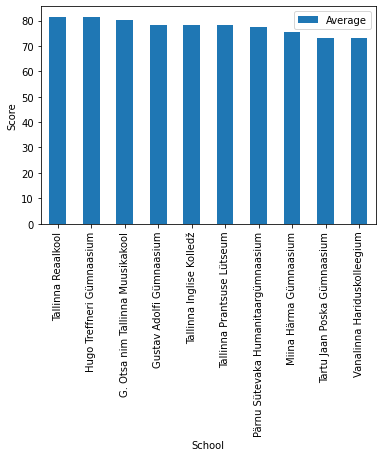

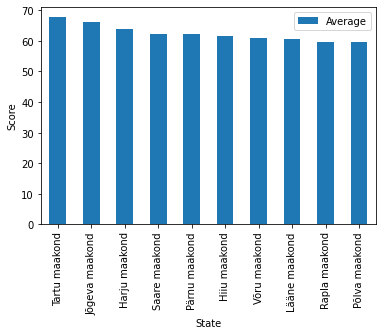

In [17]:
school = BestSchool(Est2018_Schools)
state = BestState(Est2018_States)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"])
state = state.plot(x ='Maakond', y='Keskmine', kind='bar')
state.set_xlabel("State")
state.set_ylabel("Score")
state.legend(["Average"])

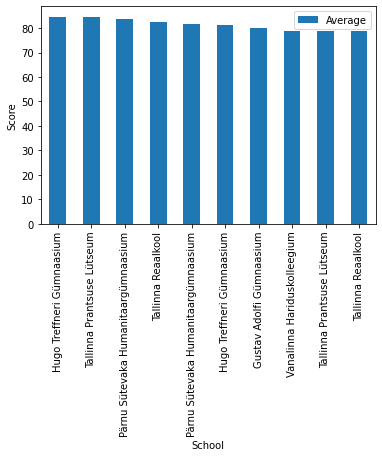

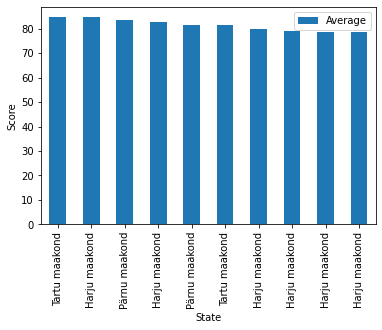

In [18]:
school = BestSchool(Est2019)
state = BestState(Est2019)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"]);
state = state.plot(x ='Maakond', y='Keskmine', kind='bar')
state.set_xlabel("State")
state.set_ylabel("Score")
state.legend(["Average"]);

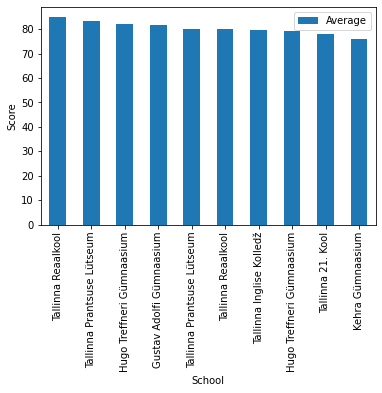

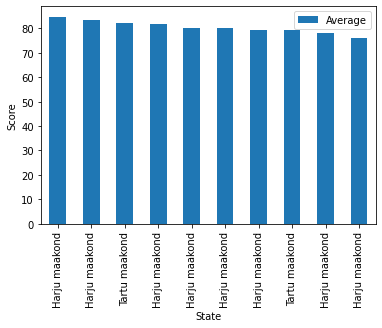

In [19]:
school = BestSchool(Est2020)
state = BestState(Est2020)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"]);
state = state.plot(x ='Maakond', y='Keskmine', kind='bar')
state.set_xlabel("State")
state.set_ylabel("Score")
state.legend(["Average"]);

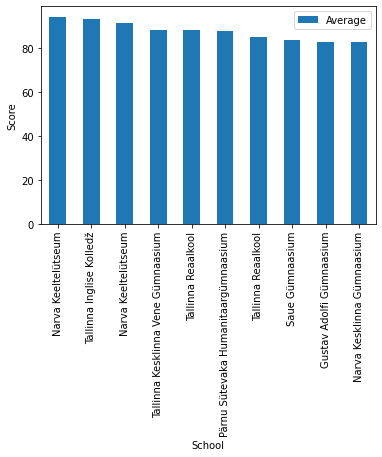

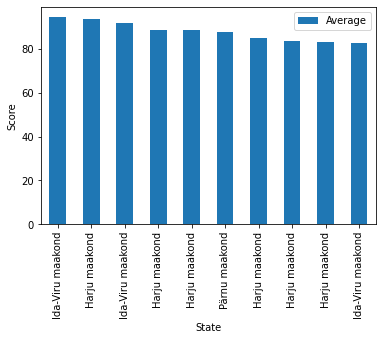

In [20]:
school = BestSchool(Math2018A)
state = BestState(Math2018A)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"]);
state = state.plot(x ='Maakond', y='Keskmine', kind='bar')
state.set_xlabel("State")
state.set_ylabel("Score")
state.legend(["Average"]);

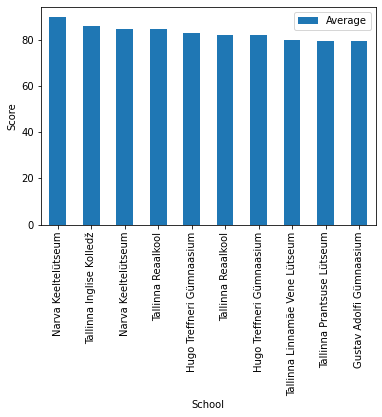

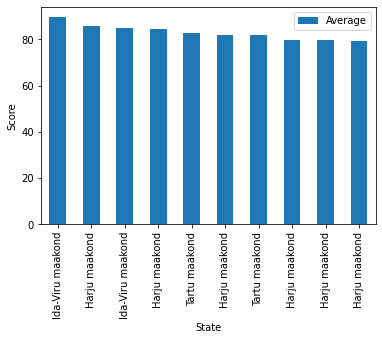

In [21]:
school = BestSchool(Math2019A)
state = BestState(Math2019A)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"]);
state = state.plot(x ='Maakond', y='Keskmine', kind='bar')
state.set_xlabel("State")
state.set_ylabel("Score")
state.legend(["Average"]);

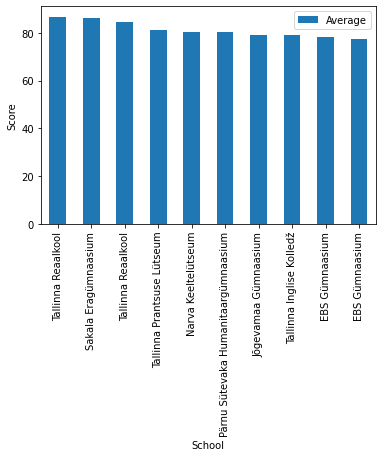

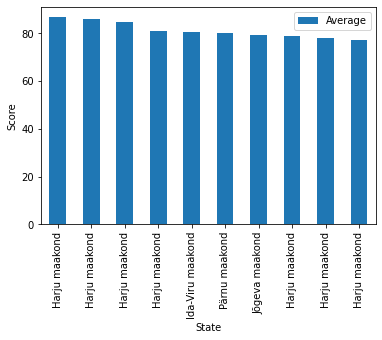

In [22]:
school = BestSchool(Math2020A)
state = BestState(Math2020A)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"]);
state = state.plot(x ='Maakond', y='Keskmine', kind='bar')
state.set_xlabel("State")
state.set_ylabel("Score")
state.legend(["Average"]);

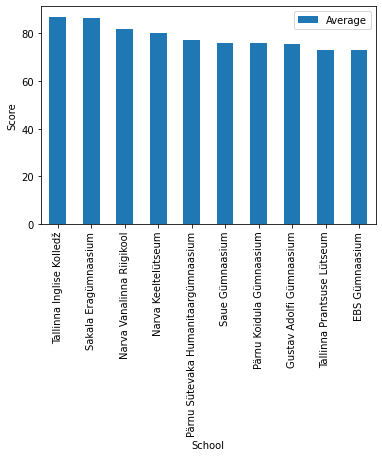

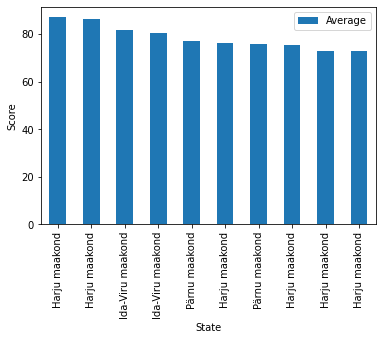

In [23]:
school = BestSchool(Math2018)
state = BestState(Math2018)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"]);
state = state.plot(x ='Maakond', y='Keskmine', kind='bar')
state.set_xlabel("State")
state.set_ylabel("Score")
state.legend(["Average"]);

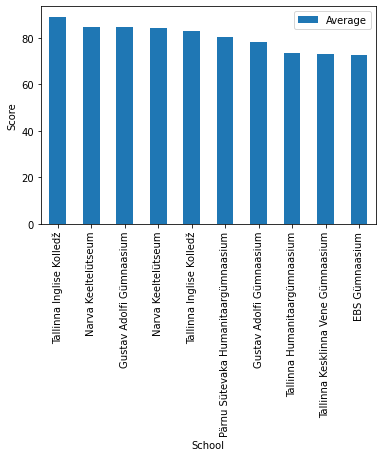

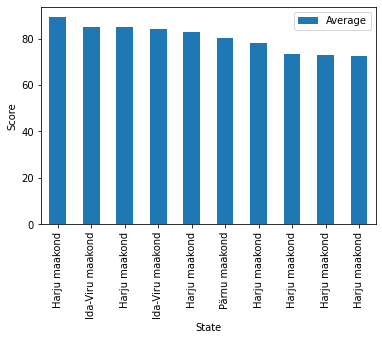

In [24]:
school = BestSchool(Math2019)
state = BestState(Math2019)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"]);
state = state.plot(x ='Maakond', y='Keskmine', kind='bar')
state.set_xlabel("State")
state.set_ylabel("Score")
state.legend(["Average"]);

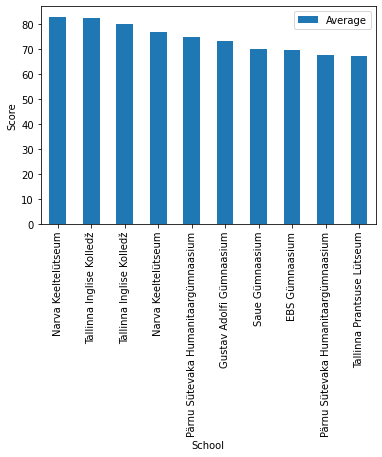

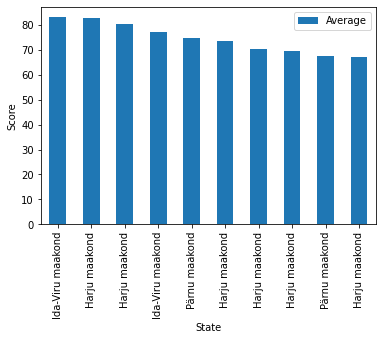

In [25]:
school = BestSchool(Math2020)
state = BestState(Math2020)

school = school.plot(x ='Õppeasutus', y='Keskmine', kind='bar')
school.set_xlabel("School")
school.set_ylabel("Score")
school.legend(["Average"]);
state = state.plot(x ='Maakond', y='Keskmine', kind='bar')
state.set_xlabel("State")
state.set_ylabel("Score")
state.legend(["Average"]);

In [26]:
est2018 = find(Est2018,[])
est2019 = find(Est2019,[])
eks = est2018["Keskmine"]
eks1 = est2019["Keskmine"]
stats.ttest_ind(eks,eks1)

Ttest_indResult(statistic=0.6105051608706854, pvalue=0.5420120533779875)